Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

Data

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

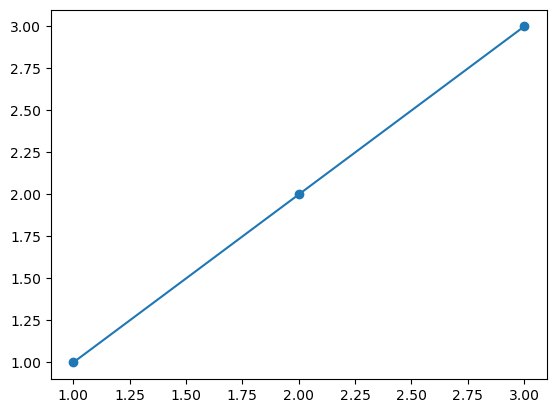

In [4]:
plt.scatter(x_train, y_train)
xs = np.linspace(1, 3, 1000)
plt.plot(xs, xs)

Cost by W

- $H(x) = Wx$

In [ ]:
W_l = np.linspace(-5, 7, 1000)
cost_l = []
for W in W_l:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) ** 2)

    cost_l.append(cost.item())

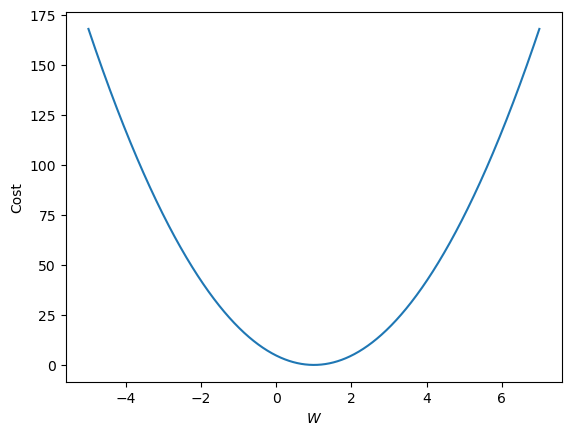

In [6]:
plt.plot(W_l, cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

Gradient Descent by Hand

In [13]:
W = 0

$$
\text{cost}(W)
= \frac{1}{m} \sum_{i=1}^{m} \left( W x^{(i)} - y^{(i)} \right)^2
$$


$$
\nabla W
= \frac{\partial \text{cost}}{\partial W}
= \frac{2}{m} \sum_{i=1}^{m} \left( W x^{(i)} - y^{(i)} \right) x^{(i)}
$$


In [14]:
gradient = torch.mean((W * x_train - y_train) * x_train) * 2
print(gradient)

tensor(-9.3333)


$$
W := W - \alpha \nabla W
$$

In [15]:
lr = 0.1
W -= lr * gradient
print(W)

tensor(0.9333)


Training

In [16]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화
W = torch.zeros(1)

# learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost gradient로 H(x) 개선
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


Training with `optim`

In [17]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))


Epoch    0/10 W: 1.400 Cost: 4.666667
Epoch    1/10 W: 0.840 Cost: 0.746667
Epoch    2/10 W: 1.064 Cost: 0.119467
Epoch    3/10 W: 0.974 Cost: 0.019115
Epoch    4/10 W: 1.010 Cost: 0.003058
Epoch    5/10 W: 0.996 Cost: 0.000489
Epoch    6/10 W: 1.002 Cost: 0.000078
Epoch    7/10 W: 0.999 Cost: 0.000013
Epoch    8/10 W: 1.000 Cost: 0.000002
Epoch    9/10 W: 1.000 Cost: 0.000000
Epoch   10/10 W: 1.000 Cost: 0.000000


c:\Users\hhnur\anaconda3\Lib\site-packages\torch\autograd\graph.py:825: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\cuda\CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
